In [28]:
# 1. Importing necessary libraries
import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For better visuals

# To display plots inline in Jupyter
%matplotlib inline


In [29]:
# 2. Load the dataset
df = pd.read_csv("Global_Superstore(CSV).csv")

# Show first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [30]:
# 3. Understand the data
print("Shape of dataset:", df.shape)  # rows and columns
print("\nColumn Names:\n", df.columns)
df.info()  # Detailed data types and null info


Shape of dataset: (1000, 24)

Column Names:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    

In [31]:
# 4. Check for missing values
df.isnull().sum()


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [32]:
# 5. Check for duplicate records
df.duplicated().sum()


0

In [34]:
# Optional: Drop duplicates if any
df.drop_duplicates(inplace=True)


In [37]:
# 6. Convert Order Date and Ship Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create new column: Month-Year for time-based analysis
df['Month'] = df['Order Date'].dt.to_period('M')


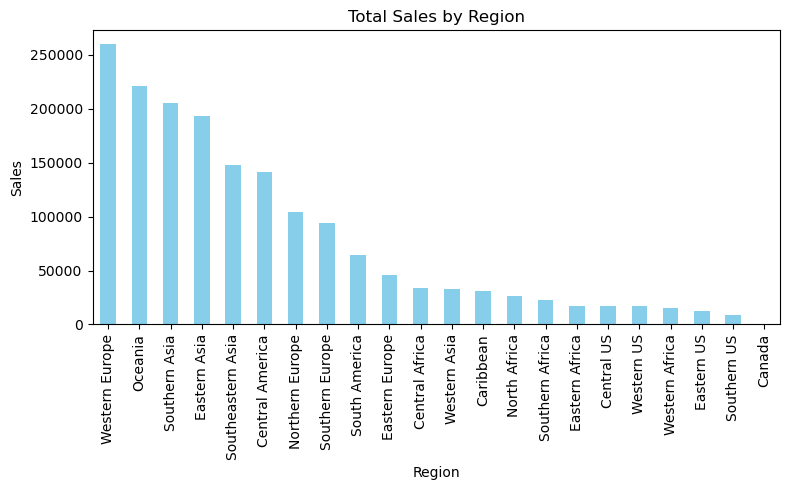

In [38]:
# 7. Total Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting
region_sales.plot(kind='bar', color='skyblue', figsize=(8,5), title='Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


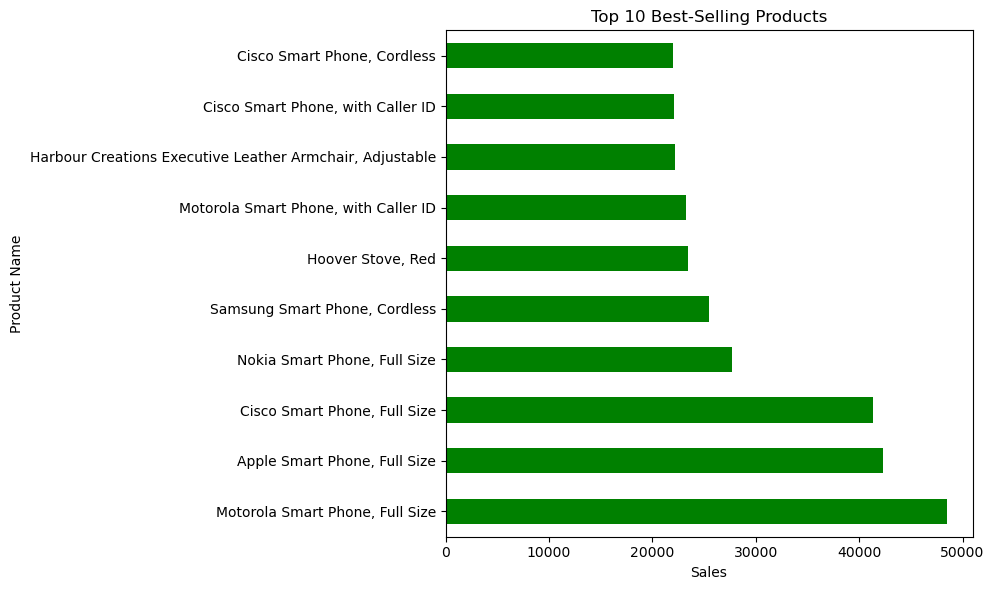

In [39]:
# 8. Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting
top_products.plot(kind='barh', figsize=(10,6), color='green', title='Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()


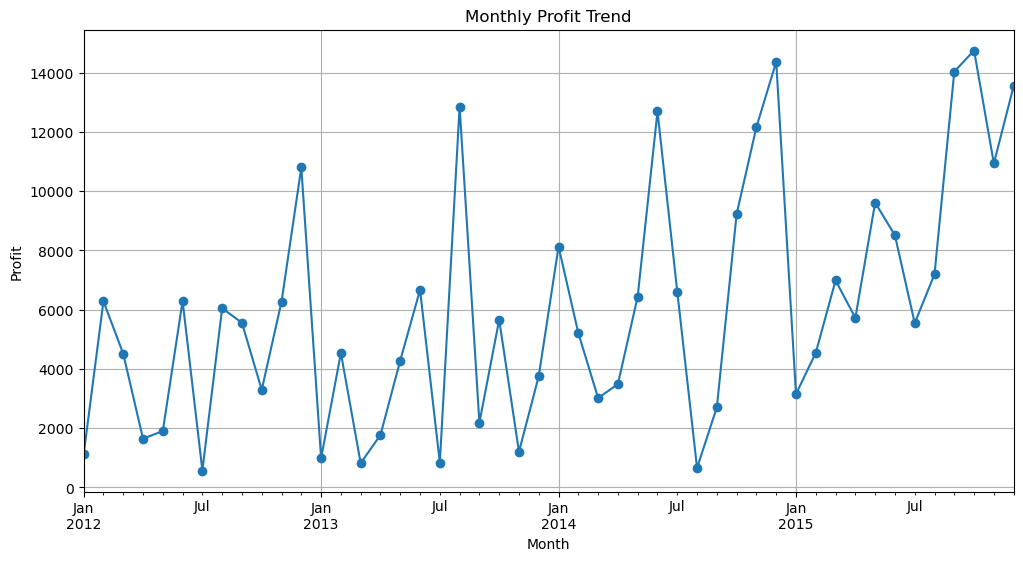

In [40]:
# 9. Monthly Profit Trend
monthly_profit = df.groupby('Month')['Profit'].sum()

# Plotting
monthly_profit.plot(figsize=(12,6), marker='o', title='Monthly Profit Trend')
plt.ylabel('Profit')
plt.xlabel('Month')
plt.grid(True)
plt.show()


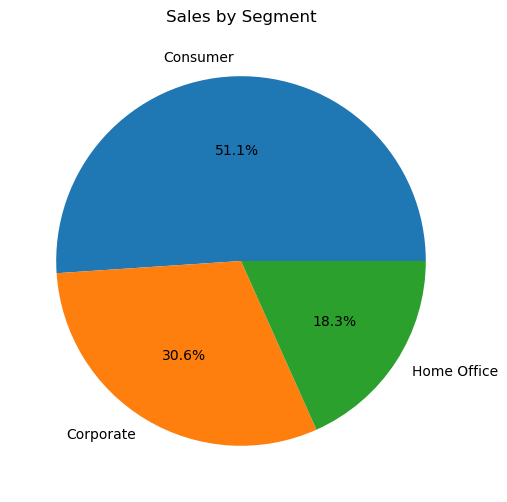

In [41]:
# 10. Segment-wise Sales
segment_sales = df.groupby('Segment')['Sales'].sum()

# Pie chart
segment_sales.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Sales by Segment')
plt.ylabel('')
plt.show()


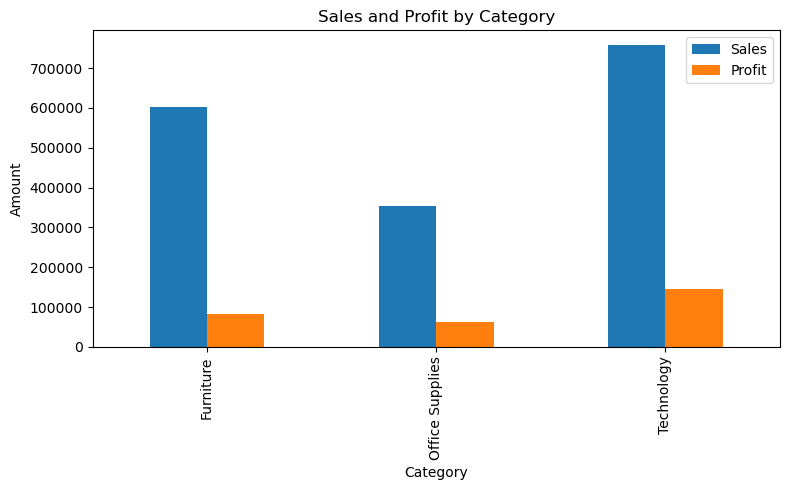

In [42]:
# 11. Category-wise Sales and Profit
category_data = df.groupby('Category')[['Sales', 'Profit']].sum()

# Bar Plot
category_data.plot(kind='bar', figsize=(8,5), title='Sales and Profit by Category')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()
